In [1]:
# Análisis
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 16)
plt.style.use('ggplot')

In [2]:
def general_info (df):
    """
                        ---What it does--
    This function checks the info, columns and shape of the df, printing them. Also it checks the presence of NaNs values on the df and prints them in case it founds them.

                        ---What it needs---
    A df object
    """


    # df columns info
    print('-dtype, length and name of columns-')
    print(df.info())
    print()
    print(df.columns)
    print()
    print(df.shape)
    print()

    # Presence of NaNs in df
    need_to_print =  False
    nulls = df.isnull().any()
    print('-Presence of NaNs in df-')
    print (nulls)
    for e in list(nulls):
        if e == True:
            need_to_print = True
    if need_to_print == True:
        print()
        print('-Number of NaNs in df-')
        print (df.isnull().sum() )

In [23]:
# Func David
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')
        
# Func David 2
def displaydf(dataframe, cols = None, rows = None):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

displaydf(sniff(df))

,sample,data type,percent missing
categoria,7,int64,0.0
op,34.298,float64,0.0
co,28.1488,float64,0.0
ex,41.9488,float64,0.0
ag,29.3703,float64,0.0
ne,9.84158,float64,0.0
wordcount,37.0945,float64,0.0
usuario,3gerardpique,object,0.0


True

In [3]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\general_dfs\analisis.csv')
df.head(2)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7


# EDA

In [4]:
general_info(df)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
usuario      140 non-null object
op           140 non-null float64
co           140 non-null float64
ex           140 non-null float64
ag           140 non-null float64
ne           140 non-null float64
wordcount    140 non-null float64
categoria    140 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB
None

Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')

(140, 8)

-Presence of NaNs in df-
usuario      False
op           False
co           False
ex           False
ag           False
ne           False
wordcount    False
categoria    False
dtype: bool


In [5]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [6]:
print(df.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


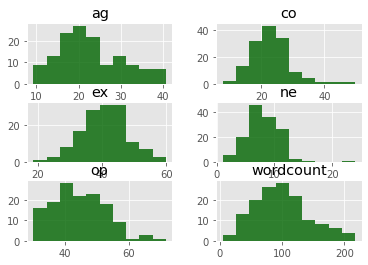

In [7]:
df.drop(['categoria'],1).hist(color='darkgreen', alpha = 0.8)
plt.show()

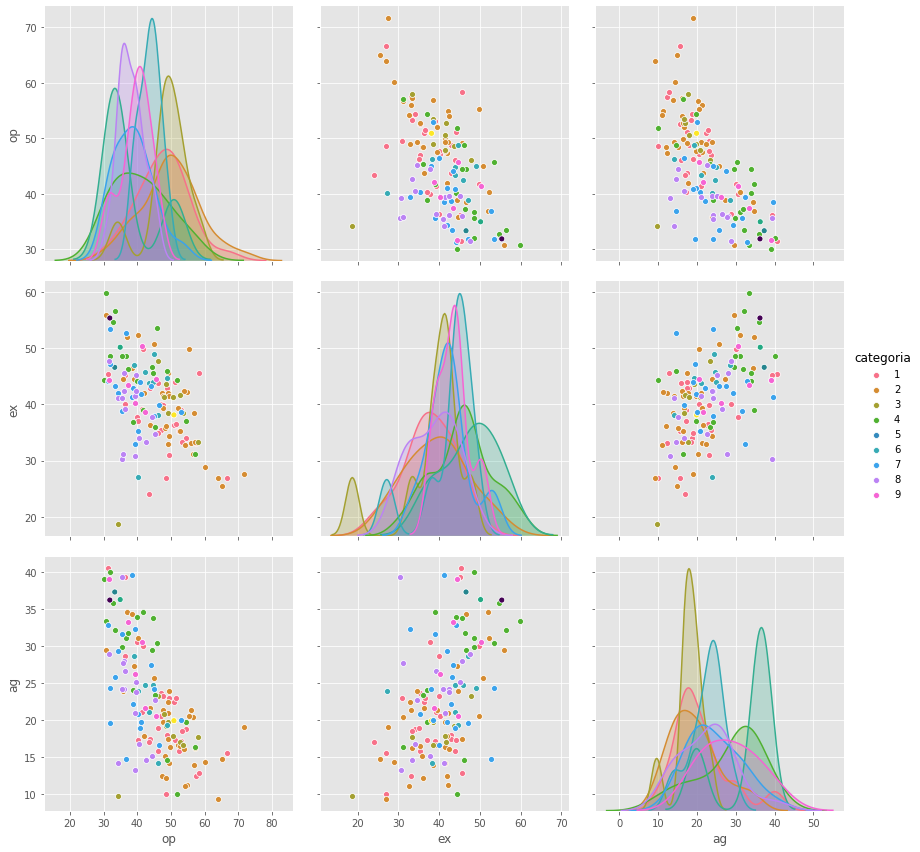

In [8]:
sns.pairplot(df.dropna(), hue='categoria', size=4, vars=["op","ex","ag"], kind='scatter');

# ML

In [9]:
X = np.array(df[["op","ex","ag"]])
y = np.array(df['categoria'])

X.shape

(140, 3)

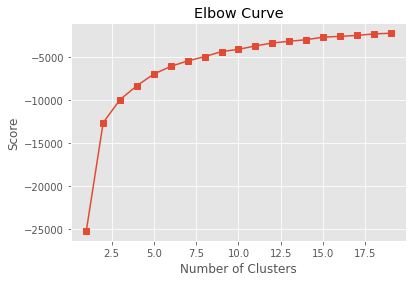

In [10]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score, marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [11]:
k = 5                                               # Nº de clusters
k_means = KMeans(n_clusters = k, random_state = 0)  # Clasificador

In [12]:
y_pred_k_means = k_means.fit(X)
y_pred_k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
centroids = y_pred_k_means.cluster_centers_
centroids

array([[42.75925435, 32.7509888 , 21.08881555],
       [35.90241306, 47.56828232, 33.58748762],
       [58.70462307, 30.53566167, 15.72207033],
       [50.42588653, 40.66723528, 17.30892462],
       [40.14744474, 43.54690971, 23.11790265]])

In [14]:
# Plotting the data from the classifier

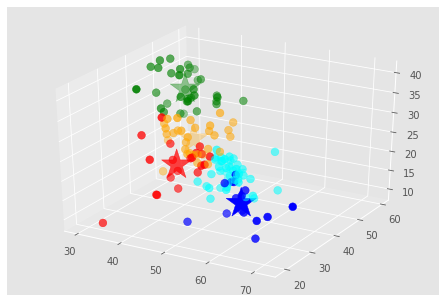

In [15]:
# Predicting Clusters
labels = k_means.predict(X)

# Getting the cluster centers
C = k_means.cluster_centers_
colors=['red','green','blue','cyan','orange']
assigment=[]
for row in labels:
    assigment.append(colors[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= assigment,s = 60)                   # Clusters
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c= colors, s= 1000);        # Cluster's Core

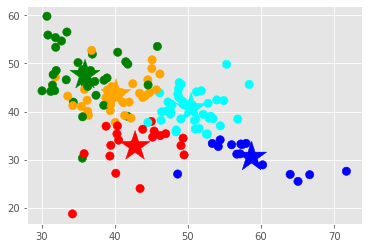

In [16]:
# Getting the values and plotting it
# First set of columns
f1 = df['op'].values
f2 = df['ex'].values
 
plt.scatter(f1, f2, c= assigment, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c= colors, s=1000)
plt.show();

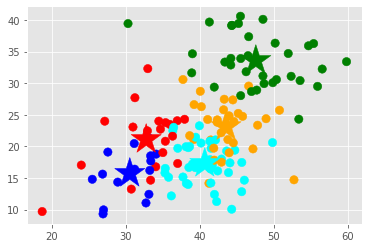

In [17]:
# Second set of columns
f1 = df['ex'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c = assigment, s = 70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c = colors, s = 1000)
plt.show()

In [18]:
# Number of dots
copy =  pd.DataFrame()
copy['usuario'] = df['usuario'].values
copy['categoria'] = df['categoria'].values
copy['label'] = labels

quantity =  pd.DataFrame()
quantity['color']= colors
quantity['cantidad']=copy.groupby('label').size()
quantity

,color,cantidad
0,red,20
1,green,34
2,blue,15
3,cyan,40
4,orange,31


In [19]:
# Diversity of cathegories
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria'] = [0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad'] = group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


# Búsqueda de problema

In [20]:
# Closest dot to core. Representative of the "tipical" personality profile for that job
closest, _ = pairwise_distances_argmin_min(k_means.cluster_centers_, X)
closest

array([120,  98,  82,  21,  64], dtype=int64)

In [21]:
users = df['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
maria_patino
JudgeJudy
carmenelectra
ierrejon


In [22]:
# Shows category for given user
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = k_means.predict(X_new)
print(new_labels)

[4]
